In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import os
from sklearn import linear_model
import seaborn as sns

In [2]:
df= pd.read_json('zasedenost_final.json')
stations_data= pd.read_json('../podatki/postajalisca.json')


In [3]:
df['date'] = pd.to_datetime(df['date'])

position = df.columns.get_loc('Datum') + 1

# Vstavljanje stolpcev 'ura' in 'minuta' desno od stolpca 'weekday'
df.insert(position, 'Dan', df['date'].dt.day)
df.insert(position+1, 'Mesec', df['date'].dt.month)
df

,date,station,zasedenost,weekday,Tip,Datum,Dan,Mesec,Ura,Minuta,temperature_2m (°C),relativehumidity_2m (%),apparent_temperature (°C),precipitation (mm),weathercode (wmo code),cloudcover (%),windspeed_10m (km/h),latitude,longitude
0,2022-02-01 06:00:00,GOSPOSVETSKA C. - TURNERJEVA UL.,0,2,1,2022-02-01,1,2,6,0,-1.3,83,-4.9,0.0,1,45,6.1,46.562739,15.629261
1,2022-02-01 06:00:00,LIDL - KOROŠKA C.,21,2,1,2022-02-01,1,2,6,0,-1.3,83,-4.9,0.0,1,45,6.1,46.565550,15.623115
2,2022-02-01 06:00:00,KOROŠKA C. - KOROŠKI VETER,9,2,1,2022-02-01,1,2,6,0,-1.3,83,-4.9,0.0,1,45,6.1,46.559605,15.635048
3,2022-02-01 06:00:00,GOSPOSVETSKA C. - VRBANSKA C.,10,2,1,2022-02-01,1,2,6,0,-1.3,83,-4.9,0.0,1,45,6.1,46.559313,15.636839
4,2022-02-01 06:00:00,GOSPOSVETSKA C. - III. GIMNAZIJA,16,2,1,2022-02-01,1,2,6,0,-1.3,83,-4.9,0.0,1,45,6.1,46.560758,15.640460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119800,2022-12-31 00:00:00,PARTIZANSKA C. - TIC,4,6,2,2022-12-31,31,12,0,0,6.7,94,3.9,0.0,1,33,11.7,46.560214,15.650788
119801,2022-12-31 00:00:00,RAZLAGOVA UL. - OBČINA,19,6,2,2022-12-31,31,12,0,0,6.7,94,3.9,0.0,1,33,11.7,46.562011,15.650269
119802,2022-12-31 00:00:00,PARTIZANSKA C. - CANKARJEVA UL,2,6,2,2022-12-31,31,12,0,0,6.7,94,3.9,0.0,1,33,11.7,46.560520,15.653058
119803,2022-12-31 00:00:00,MLINSKA UL . - AVTOBUSNA POSTAJA,14,6,2,2022-12-31,31,12,0,0,6.7,94,3.9,0.0,1,33,11.7,46.558428,15.654662


# Normalizacija

In [4]:
'''cols_to_normalize = ['temperature_2m (°C)', 'relativehumidity_2m (%)', 'apparent_temperature (°C)',
                     'precipitation (mm)', 'weathercode (wmo code)', 'cloudcover (%)',
                     'windspeed_10m (km/h)']

for col in cols_to_normalize:
    df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())
df'''

"cols_to_normalize = ['temperature_2m (°C)', 'relativehumidity_2m (%)', 'apparent_temperature (°C)',\n                     'precipitation (mm)', 'weathercode (wmo code)', 'cloudcover (%)',\n                     'windspeed_10m (km/h)']\n\nfor col in cols_to_normalize:\n    df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())\ndf"

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119805 entries, 0 to 119804
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   date                       119805 non-null  datetime64[ns]
 1   station                    119805 non-null  object        
 2   zasedenost                 119805 non-null  int64         
 3   weekday                    119805 non-null  int64         
 4   Tip                        119805 non-null  int64         
 5   Datum                      119805 non-null  object        
 6   Dan                        119805 non-null  int64         
 7   Mesec                      119805 non-null  int64         
 8   Ura                        119805 non-null  int64         
 9   Minuta                     119805 non-null  int64         
 10  temperature_2m (°C)        119805 non-null  float64       
 11  relativehumidity_2m (%)    119805 non-null  int64   

In [6]:
df.head()

,date,station,zasedenost,weekday,Tip,Datum,Dan,Mesec,Ura,Minuta,temperature_2m (°C),relativehumidity_2m (%),apparent_temperature (°C),precipitation (mm),weathercode (wmo code),cloudcover (%),windspeed_10m (km/h),latitude,longitude
0,2022-02-01 06:00:00,GOSPOSVETSKA C. - TURNERJEVA UL.,0,2,1,2022-02-01,1,2,6,0,-1.3,83,-4.9,0.0,1,45,6.1,46.562739,15.629261
1,2022-02-01 06:00:00,LIDL - KOROŠKA C.,21,2,1,2022-02-01,1,2,6,0,-1.3,83,-4.9,0.0,1,45,6.1,46.565550,15.623115
2,2022-02-01 06:00:00,KOROŠKA C. - KOROŠKI VETER,9,2,1,2022-02-01,1,2,6,0,-1.3,83,-4.9,0.0,1,45,6.1,46.559605,15.635048
3,2022-02-01 06:00:00,GOSPOSVETSKA C. - VRBANSKA C.,10,2,1,2022-02-01,1,2,6,0,-1.3,83,-4.9,0.0,1,45,6.1,46.559313,15.636839
4,2022-02-01 06:00:00,GOSPOSVETSKA C. - III. GIMNAZIJA,16,2,1,2022-02-01,1,2,6,0,-1.3,83,-4.9,0.0,1,45,6.1,46.560758,15.640460


In [7]:
# Preverjanje če je katera vrednost null
df.isnull().sum()

date                         0
station                      0
zasedenost                   0
weekday                      0
Tip                          0
Datum                        0
Dan                          0
Mesec                        0
Ura                          0
Minuta                       0
temperature_2m (°C)          0
relativehumidity_2m (%)      0
apparent_temperature (°C)    0
precipitation (mm)           0
weathercode (wmo code)       0
cloudcover (%)               0
windspeed_10m (km/h)         0
latitude                     0
longitude                    0
dtype: int64

In [8]:
df.describe()

,zasedenost,weekday,Tip,Dan,Mesec,Ura,Minuta,temperature_2m (°C),relativehumidity_2m (%),apparent_temperature (°C),precipitation (mm),weathercode (wmo code),cloudcover (%),windspeed_10m (km/h),latitude,longitude
count,119805.000000,119805.000000,119805.000000,119805.000000,119805.000000,119805.000000,119805.0,119805.000000,119805.000000,119805.000000,119805.000000,119805.000000,119805.000000,119805.000000,119805.000000,119805.000000
mean,9.932398,3.995743,1.354701,15.661575,7.028421,11.505321,0.0,12.761650,74.098660,11.495167,0.092976,9.650432,44.431201,7.765131,46.560462,15.643766
std,6.078563,1.992477,0.554092,8.750148,3.136820,6.921023,0.0,8.429543,18.122526,10.198061,0.368118,19.794709,35.799912,4.387578,0.002120,0.009263
min,0.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.0,-5.400000,24.000000,-9.100000,0.000000,0.000000,0.000000,0.000000,46.557309,15.623115
25%,5.000000,2.000000,1.000000,8.000000,4.000000,6.000000,0.0,5.600000,61.000000,2.600000,0.000000,0.000000,11.000000,4.700000,46.558525,15.636839
50%,10.000000,4.000000,1.000000,16.000000,7.000000,12.000000,0.0,13.000000,76.000000,11.700000,0.000000,1.000000,36.000000,6.800000,46.560214,15.644449
75%,15.000000,6.000000,2.000000,23.000000,10.000000,18.000000,0.0,19.300000,90.000000,19.800000,0.000000,3.000000,79.000000,9.900000,46.562011,15.650788
max,21.000000,7.000000,3.000000,31.000000,12.000000,23.000000,0.0,34.100000,100.000000,35.800000,5.900000,75.000000,100.000000,29.400000,46.565550,15.656958


In [9]:
columnsToDrop= ['station', 'date', 'Datum', 'Minuta']
grafi = df.copy()
grafi.drop(columnsToDrop, axis=1, inplace=True)

c:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


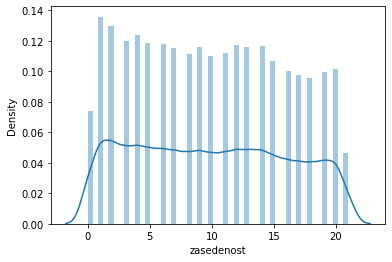

c:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


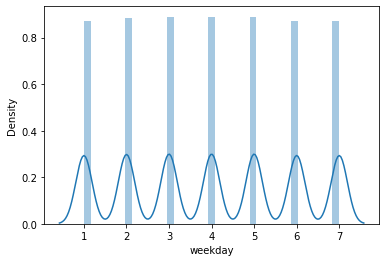

c:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


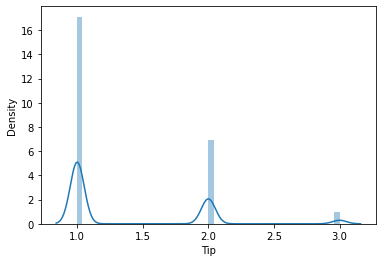

c:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


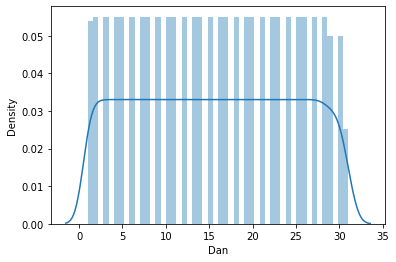

c:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


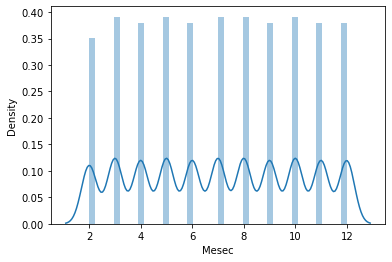

c:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


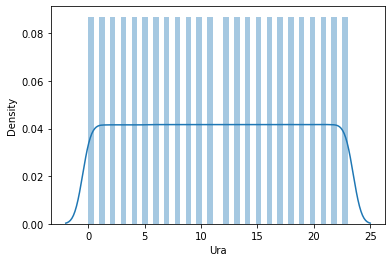

c:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


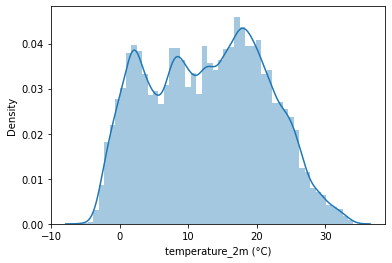

c:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


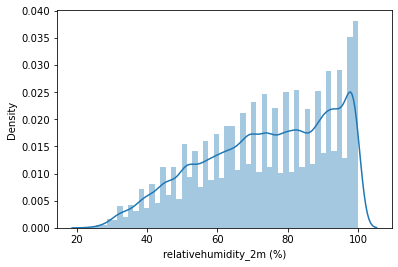

c:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


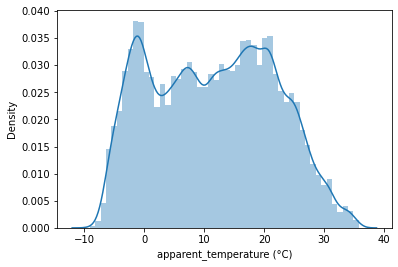

c:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


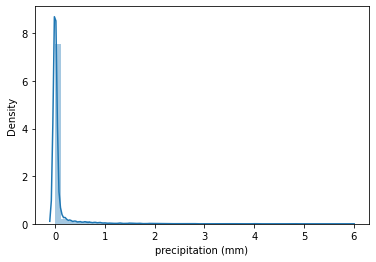

c:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


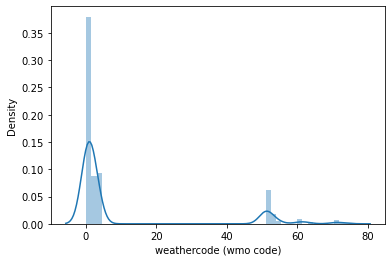

c:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


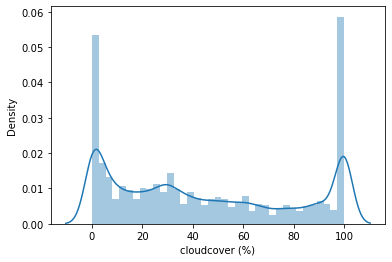

c:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


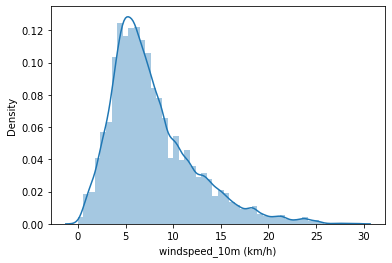

c:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


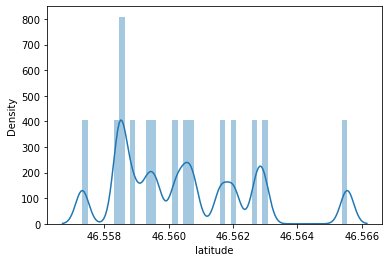

c:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


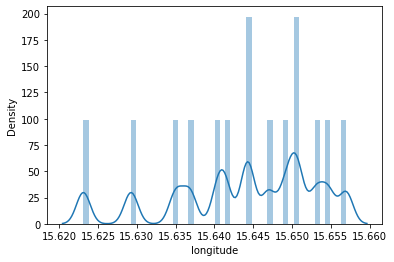

In [10]:
columns = grafi.columns.values
for x in columns:
    sns.distplot(grafi[x], kde=True)
    plt.show()

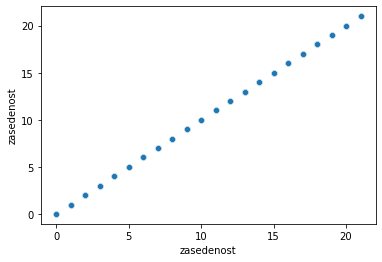

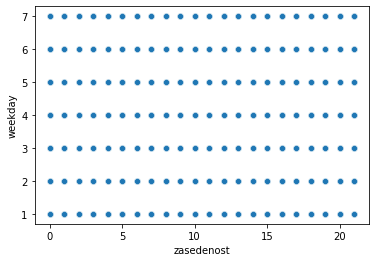

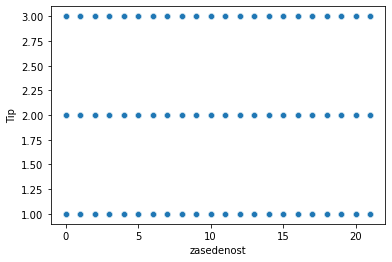

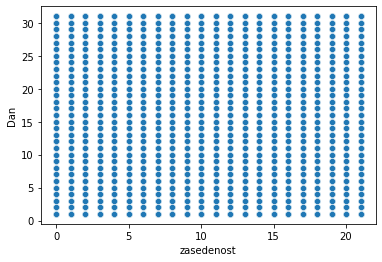

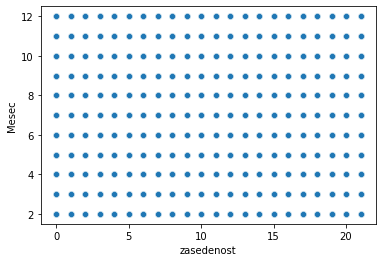

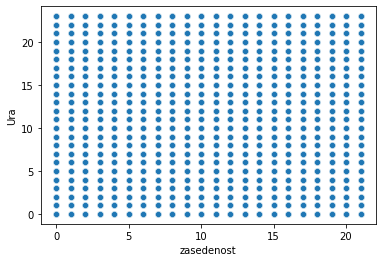

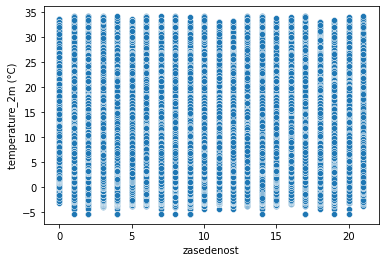

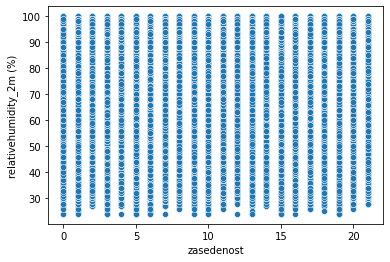

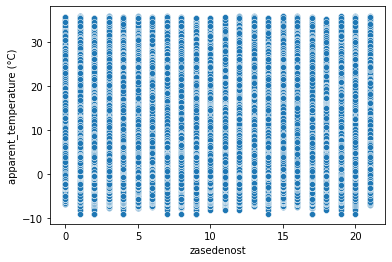

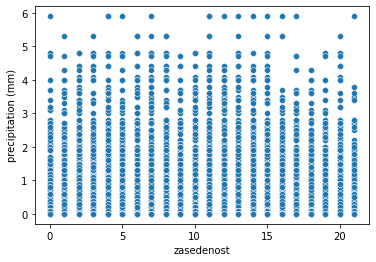

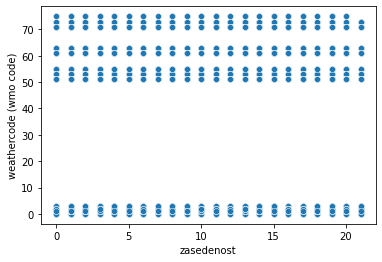

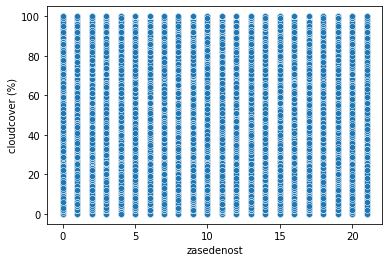

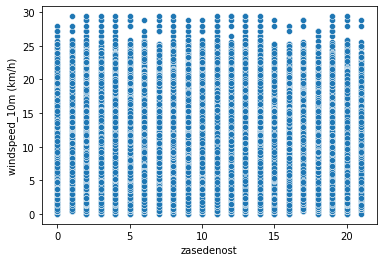

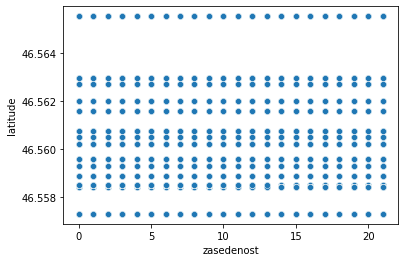

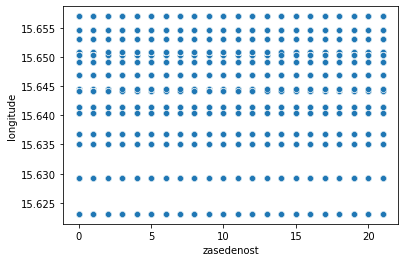

In [11]:
# visualizing relationship of variables with 'cnt'
for y in columns:
    sns.scatterplot(x='zasedenost', y=y, data= grafi)
    plt.show()

<AxesSubplot:>

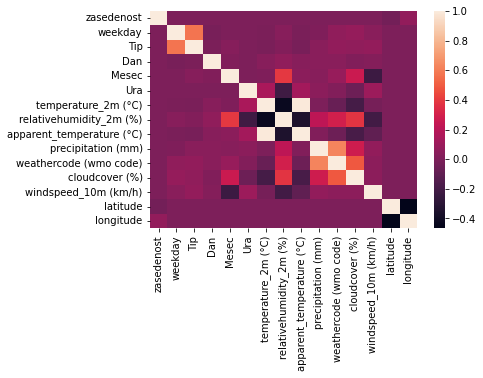

In [12]:
sns.heatmap(grafi.corr())

## Linearna regresija

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

features = df[['Tip', 'weekday', 'Ura', 'Dan', 'Mesec', 'temperature_2m (°C)', 'relativehumidity_2m (%)', 'precipitation (mm)', 'cloudcover (%)', 'windspeed_10m (km/h)',  'latitude', 'longitude']]


target = df['zasedenost']

# Delitev podatkov na učno in testno množico
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Ustvarjanje modela
model = LinearRegression()

# Učenje modela
model.fit(X_train, y_train)

# Napovedovanje
y_pred = model.predict(X_test)

# Evaluacija modela
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 36.78152483460699


## Random forest

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Delitev podatkov na učno in testno množico
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Ustvarjanje modela Random Forest
model = RandomForestRegressor(n_estimators=200, random_state=42)

# Učenje modela
model.fit(X_train, y_train)

# Napovedovanje
y_pred = model.predict(X_test)

# Evaluacija modela
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("R^2:", r2)

Mean Squared Error: 1.9360271128083135
Mean Absolute Error: 0.9929376904135887
R^2: 0.9476575414182848


In [17]:
vrstica = df.loc[df['date'] == '2022-07-26 15:00:00']
vrstica

,date,station,zasedenost,weekday,Tip,Datum,Dan,Mesec,Ura,Minuta,temperature_2m (°C),relativehumidity_2m (%),apparent_temperature (°C),precipitation (mm),weathercode (wmo code),cloudcover (%),windspeed_10m (km/h),latitude,longitude
63135,2022-07-26 15:00:00,GOSPOSVETSKA C. - TURNERJEVA UL.,1,2,1,2022-07-26,26,7,15,0,25.1,62,27.1,0.1,51,23,3.8,46.562739,15.629261
63136,2022-07-26 15:00:00,LIDL - KOROŠKA C.,1,2,1,2022-07-26,26,7,15,0,25.1,62,27.1,0.1,51,23,3.8,46.565550,15.623115
63137,2022-07-26 15:00:00,KOROŠKA C. - KOROŠKI VETER,12,2,1,2022-07-26,26,7,15,0,25.1,62,27.1,0.1,51,23,3.8,46.559605,15.635048
63138,2022-07-26 15:00:00,GOSPOSVETSKA C. - VRBANSKA C.,6,2,1,2022-07-26,26,7,15,0,25.1,62,27.1,0.1,51,23,3.8,46.559313,15.636839
63139,2022-07-26 15:00:00,GOSPOSVETSKA C. - III. GIMNAZIJA,2,2,1,2022-07-26,26,7,15,0,25.1,62,27.1,0.1,51,23,3.8,46.560758,15.640460
63140,2022-07-26 15:00:00,STROSSMAYERJEVA UL. - TRŽNICA,17,2,1,2022-07-26,26,7,15,0,25.1,62,27.1,0.1,51,23,3.8,46.558511,15.641430
63141,2022-07-26 15:00:00,POŠTA - SLOMŠKOV TRG,21,2,1,2022-07-26,26,7,15,0,25.1,62,27.1,0.1,51,23,3.8,46.558877,15.644449
63142,2022-07-26 15:00:00,MLADINSKA UL. - TRUBARJEVA UL.,14,2,1,2022-07-26,26,7,15,0,25.1,62,27.1,0.1,51,23,3.8,46.562957,15.644118
63143,2022-07-26 15:00:00,TELEMACH - GLAVNI TRG - STARI PERON,9,2,1,2022-07-26,26,7,15,0,25.1,62,27.1,0.1,51,23,3.8,46.557309,15.646944
63144,2022-07-26 15:00:00,NKBM - TRG LEONA ŠTUKLJA,15,2,1,2022-07-26,26,7,15,0,25.1,62,27.1,0.1,51,23,3.8,46.558525,15.649086


In [18]:
import pandas as pd
from geopy.distance import geodesic

def find_nearest_stations(user_latitude, user_longitude, stations_data, num_stations=3):
    # Izračun razdalje med uporabnikovo lokacijo in vsako postajo
    distances = stations_data.apply(lambda row: geodesic((user_latitude, user_longitude), (row['latitude'], row['longitude'])).kilometers, axis=1)
    
    # Dodajanje stolpca za razdalco v podatkovni okvir postaj
    stations_data['distance_to_user'] = distances
    
    # Izberite najbližje tri postaje
    nearest_stations = stations_data.nsmallest(num_stations, 'distance_to_user')
    
    return nearest_stations

# Predpostavimo, da imate podatke o postajah v podatkovnem okviru stations_data
# in da imate vašo lokacijo določeno z user_latitude in user_longitude

nearest_stations = find_nearest_stations(46.564208, 15.625217, stations_data)
nearest_stations



,ime,naslov,latitude,longitude,kolesaArray,distance_to_user
1,LIDL - KOROŠKA C.,Koroška cesta 173,46.565550,15.623115,"[K012, K013, K014, K015, K016, K017, K018, K01...",0.219646
0,GOSPOSVETSKA C. - TURNERJEVA UL.,Gosposvetska cesta 69,46.562739,15.629261,"[K001, K002, K003, K004, K005, K006, K007, K00...",0.350457
2,KOROŠKA C. - KOROŠKI VETER,Koroška cesta 74,46.559605,15.635048,[K023],0.911073


In [19]:
from datetime import datetime

desired_date_str = input("Vnesite datum v obliki 'YYYY-MM-DD' 'h:m:s': ")
desired_hour = int(input("Vnesite uro (0-23): "))
desired_latitude = float(input("Vnesite latitude vaše lokacije: "))
desired_longitude = float(input("Vnesite longitude vaše lokacije: "))

desired_date = datetime.strptime(desired_date_str, '%Y-%m-%d %H:%M:%S')

desired_temperature = 25.5  # Primer: Pridobitev temperature prek API-ja
desired_relativehumidity = 70  # Primer: Pridobitev relativne vlažnosti prek API-ja

prediction_data = pd.DataFrame({
    'Tip': [1],  # Npr. Holiday (1), Weekend (2), Weekday (3)
    'weekday': [2],  # Npr. Monday (1), Tuesday (2), ..., Sunday (7)
    'Ura': [desired_hour],
    'Dan': [int(desired_date.split('-')[2])],
    'Mesec': [int(desired_date.split('-')[1])],
    'temperature_2m (°C)': [desired_temperature],
    'relativehumidity_2m (%)': [desired_relativehumidity],
    'precipitation (mm)': [0],  # Npr. 0 (če ni padavin)
    'cloudcover (%)': [0],  # Npr. 0 (če ni oblačnosti)
    'windspeed_10m (km/h)': [0],  # Npr. 0 (če ni vetra)
    'latitude': [desired_latitude],
    'longitude': [desired_longitude]
})

ValueError: invalid literal for int() with base 10: 'a'

In [ ]:
import pandas as pd
from datetime import datetime
from geopy.distance import geodesic

#Vhodni podatki: 2023-07-26 15:30:00   46.564208, 15.625217     46.560388, 15.642108

# Funkcija za iskanje najbližjih postaj
def find_nearest_stations(user_latitude, user_longitude, stations_data, num_stations=3):
    distances = stations_data.apply(lambda row: geodesic((user_latitude, user_longitude), (row['latitude'], row['longitude'])).kilometers, axis=1)
    stations_data['distance_to_user'] = distances
    nearest_stations = stations_data.nsmallest(num_stations, 'distance_to_user')
    return nearest_stations


# Vnos podatkov uporabnika
desired_date_str = input("Vnesite datum in uro v obliki 'YYYY-MM-DD HH:MM:SS': ")
desired_latitude = float(input("Vnesite latitude vaše lokacije: "))
desired_longitude = float(input("Vnesite longitude vaše lokacije: "))

# Pretvorba v datetime objekt
desired_date = datetime.strptime(desired_date_str, '%Y-%m-%d %H:%M:%S')

nearest_stations = find_nearest_stations(desired_latitude, desired_longitude, stations_data)

# Priprava podatkov za napovedovanje
for index, station in nearest_stations.iterrows():
    name = station['ime']
    desired_latitude = station['latitude']
    desired_longitude = station['longitude']
    
    # Priprava podatkov za napovedovanje z uporabo najbližje postaje
    prediction_data = pd.DataFrame({
        'Tip': [1],  # Npr. Holiday (1), Weekend (2), Weekday (3)
        'weekday': [desired_date.weekday() + 1],  # Npr. Monday (1), Tuesday (2), ..., Sunday (7)
        'Ura': [desired_hour],
        'Dan': [desired_date.day],  # Dan v mesecu
        'Mesec': [desired_date.month],  # Mesec (npr. januar (1), februar (2), ..., december (12))
        'temperature_2m (°C)': [25],  # Predpostavljena temperatura (nastavite želeno vrednost)
        'relativehumidity_2m (%)': [50],  # Predpostavljena relativna vlažnost (nastavite želeno vrednost)
        'precipitation (mm)': [0],  # Predpostavljena količina padavin (nastavite želeno vrednost)
        'cloudcover (%)': [0],  # Predpostavljena oblačnost (nastavite želeno vrednost)
        'windspeed_10m (km/h)': [0],  # Predpostavljena hitrost vetra (nastavite želeno vrednost)
        'latitude': [desired_latitude],
        'longitude': [desired_longitude]
    })

    # Napovedovanje zasedenosti
    predicted_occupancy = model.predict(prediction_data)

    # Izračun procenta zasedenosti (predpostavljamo, da je maksimalna zasedenost 21)
    percentage_occupancy = float((predicted_occupancy / 21) * 100)
    round(percentage_occupancy, 2)
    # Izpis procenta zasedenosti za trenutno najbližjo postajo
    print(f"Postaja: {name}, Procent zasedenosti: {percentage_occupancy}%")


Postaja: GOSPOSVETSKA C. - III. GIMNAZIJA, Procent zasedenosti: 23.452380952380953%
Postaja: STROSSMAYERJEVA UL. - TRŽNICA, Procent zasedenosti: 72.16666666666667%
Postaja: POŠTA - SLOMŠKOV TRG, Procent zasedenosti: 82.23809523809523%


In [ ]:
prediction_data

,Tip,weekday,Ura,Dan,Mesec,temperature_2m (°C),relativehumidity_2m (%),precipitation (mm),cloudcover (%),windspeed_10m (km/h),latitude,longitude
0,1,2,17,26,2,25.5,70,0,0,0,46.564208,15.625217


In [ ]:
# Predvideni datum in ura
desired_date = '2023-07-26'
desired_hour = 15

	

# 'Tip', 'weekday', 'Ura', 'Dan', 'Mesec', 'temperature_2m (°C)', 'relativehumidity_2m (%)', 'precipitation (mm)', 'cloudcover (%)', 'windspeed_10m (km/h)',  'latitude', 'longitude'

# Priprava podatkov za napovedovanje
prediction_data = pd.DataFrame({
    'Tip': [2],  # Npr. Holiday (1), Weekend (2), Weekday (3)
    'weekday': [1],  # Npr. Monday (1), Tuesday (2), ..., Sunday (7)
    'Ura': [desired_hour],
    'Dan': [26],  # Dan v mesecu
    'Mesec': [7],  # Mesec (npr. januar (1), februar (2), ..., december (12))
    'temperature_2m (°C)': [33.8],
    'relativehumidity_2m (%)': [12],
    'precipitation (mm)': [5.3],
    'cloudcover (%)': [86],
    'windspeed_10m (km/h)': [0.2],
    'latitude': [46.558877],  # Geografska širina
    'longitude': [15.644449]  # Geografska dolžina
})

# Napovedovanje zasedenosti
predicted_occupancy = model.predict(prediction_data)

# Izračun procenta zasedenosti (predpostavimo, da je maksimalna zasedenost 21)
percentage_occupancy = (predicted_occupancy / 21) * 100

print("Predviden procent zasedenosti:", percentage_occupancy)
prediction_data

Predviden procent zasedenosti: [82.64285714]


,Tip,weekday,Ura,Dan,Mesec,temperature_2m (°C),relativehumidity_2m (%),precipitation (mm),cloudcover (%),windspeed_10m (km/h),latitude,longitude
0,2,1,15,26,7,33.8,12,5.3,86,0.2,46.558877,15.644449


In [ ]:
df

,date,station,zasedenost,weekday,Tip,Datum,Dan,Mesec,Ura,Minuta,temperature_2m (°C),relativehumidity_2m (%),apparent_temperature (°C),precipitation (mm),weathercode (wmo code),cloudcover (%),windspeed_10m (km/h),latitude,longitude,distance_to_station
0,2022-02-01 06:00:00,GOSPOSVETSKA C. - TURNERJEVA UL.,0,2,1,2022-02-01,1,2,6,0,0.103797,0.776316,0.093541,0.0,0.013333,0.45,0.207483,46.562739,15.629261,1.040258
1,2022-02-01 06:00:00,LIDL - KOROŠKA C.,21,2,1,2022-02-01,1,2,6,0,0.103797,0.776316,0.093541,0.0,0.013333,0.45,0.207483,46.565550,15.623115,1.596097
2,2022-02-01 06:00:00,KOROŠKA C. - KOROŠKI VETER,9,2,1,2022-02-01,1,2,6,0,0.103797,0.776316,0.093541,0.0,0.013333,0.45,0.207483,46.559605,15.635048,0.531435
3,2022-02-01 06:00:00,GOSPOSVETSKA C. - VRBANSKA C.,10,2,1,2022-02-01,1,2,6,0,0.103797,0.776316,0.093541,0.0,0.013333,0.45,0.207483,46.559313,15.636839,0.394276
4,2022-02-01 06:00:00,GOSPOSVETSKA C. - III. GIMNAZIJA,16,2,1,2022-02-01,1,2,6,0,0.103797,0.776316,0.093541,0.0,0.013333,0.45,0.207483,46.560758,15.640460,0.184000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119800,2022-12-31 00:00:00,PARTIZANSKA C. - TIC,4,6,2,2022-12-31,31,12,0,0,0.306329,0.921053,0.289532,0.0,0.013333,0.33,0.397959,46.560214,15.650788,0.680696
119801,2022-12-31 00:00:00,RAZLAGOVA UL. - OBČINA,19,6,2,2022-12-31,31,12,0,0,0.306329,0.921053,0.289532,0.0,0.013333,0.33,0.397959,46.562011,15.650269,0.695619
119802,2022-12-31 00:00:00,PARTIZANSKA C. - CANKARJEVA UL,2,6,2,2022-12-31,31,12,0,0,0.306329,0.921053,0.289532,0.0,0.013333,0.33,0.397959,46.560520,15.653058,0.857653
119803,2022-12-31 00:00:00,MLINSKA UL . - AVTOBUSNA POSTAJA,14,6,2,2022-12-31,31,12,0,0,0.306329,0.921053,0.289532,0.0,0.013333,0.33,0.397959,46.558428,15.654662,0.979720
